In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Assignment_Dataset.csv')
df.head()

,Date,GHI,PR
0,2019/07/01,3.256608,69.575676
1,2019/07/02,3.976767,79.314411
2,2019/07/03,2.811867,61.020006
3,2019/07/04,3.658408,83.262576
4,2019/07/05,5.590683,82.124440


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [6]:
df['PR_MA'] = df['PR'].rolling(window=30, min_periods=1).mean()
df.head(31)

,Date,GHI,PR,PR_MA
0,2019-07-01,3.256608,69.575676,69.575676
1,2019-07-02,3.976767,79.314411,74.445044
2,2019-07-03,2.811867,61.020006,69.970031
3,2019-07-04,3.658408,83.262576,73.293167
4,2019-07-05,5.590683,82.124440,75.059422
5,2019-07-06,5.179733,82.764172,76.343547
6,2019-07-07,4.120733,69.924507,75.426541
7,2019-07-08,5.707992,84.789151,76.596868
8,2019-07-09,6.469825,79.152393,76.880815
9,2019-07-10,5.811892,69.085899,76.101323


In [7]:
start_date = df['Date'].min()
df['Years'] = ((df['Date'] - start_date).dt.days / 365).apply(np.floor)
df['Budget_PR'] = 73.9 - 0.6 * df['Years']

In [8]:
conditions = [
    (df['GHI'] < 2),
    (df['GHI'] >= 2) & (df['GHI'] < 4),
    (df['GHI'] >= 4) & (df['GHI'] < 6),
    (df['GHI'] >= 6)
]
colors = ['navy', 'lightblue', 'orange', 'brown']
df['Color'] = np.select(conditions, colors)

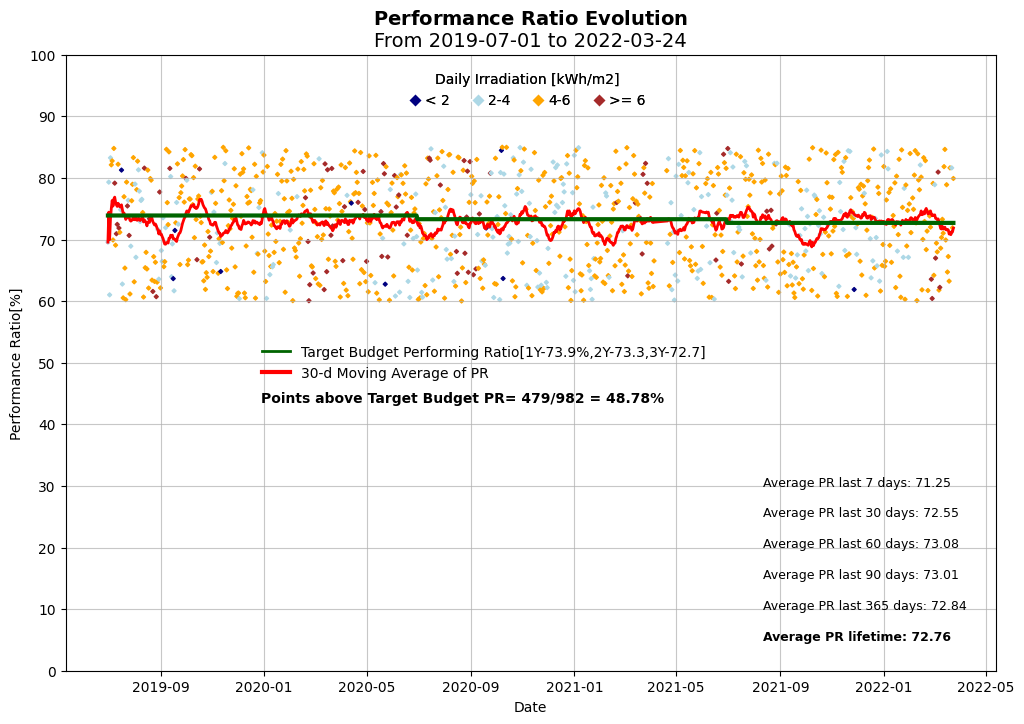

In [136]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
scatter = ax.scatter(df['Date'], df['PR'], c=df['Color'], label='PR Value', marker='D', s=4)

# 30-day moving average for PR
ax.plot(df['Date'], df['PR_MA'], color='red', label='30-d Moving Average', linewidth=2)

# Target Budget PR line
ax.plot(df['Date'], df['Budget_PR'], color='darkgreen', label='Budget PR', linewidth=3)

# Points above Target Budget PR and its percentage
above_budget = df[df['PR'] > df['Budget_PR']]
percentage_above_budget = (above_budget.shape[0] / df.shape[0]) * 100
annotation_text = f"Points above Target Budget PR= {above_budget.shape[0]}/{df['PR'].count()} = {percentage_above_budget:.2f}%"
ax.annotate(annotation_text, xy=(0.21, 0.43), xycoords='axes fraction', ha='left', va='bottom', weight='bold')

# labels and title for PR
ax.set_xlabel('Date')
ax.set_ylabel('Performance Ratio[%]')
title_text = r'$\bf{Performance\ Ratio\ Evolution}$' + '\nFrom 2019-07-01 to 2022-03-24'
ax.set_title(title_text, loc='center', fontsize=14)

# legend for PR
legend_elements = [
    Line2D([0], [0], color='darkgreen', label='Target Budget Performing Ratio[1Y-73.9%,2Y-73.3,3Y-72.7]', linewidth=2),
    Line2D([0], [0], color='red', label='30-d Moving Average of PR', linewidth=3) ,
]
legend_pr = ax.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.45, 0.5), frameon=False)
ax.add_artist(legend_pr)

# Average PR text annotation 
last_7_days_avg = df['PR_MA'].tail(7).mean()
last_30_days_avg = df['PR_MA'].tail(30).mean()
last_60_days_avg = df['PR_MA'].tail(60).mean()
last_90_days_avg = df['PR_MA'].tail(90).mean()
last_365_days_avg = df['PR_MA'].tail(365).mean()
lifetime_avg = df['PR_MA'].mean()
x_pos, y_pos = 0.75, 0.3

ax.text(x_pos, y_pos, f"Average PR last 7 days: {last_7_days_avg:.2f}", transform=ax.transAxes, fontsize=9)
ax.text(x_pos, y_pos - 0.05, f"Average PR last 30 days: {last_30_days_avg:.2f}", transform=ax.transAxes, fontsize=9)
ax.text(x_pos, y_pos - 0.1, f"Average PR last 60 days: {last_60_days_avg:.2f}", transform=ax.transAxes, fontsize=9)
ax.text(x_pos, y_pos - 0.15, f"Average PR last 90 days: {last_90_days_avg:.2f}", transform=ax.transAxes, fontsize=9)
ax.text(x_pos, y_pos - 0.2, f"Average PR last 365 days: {last_365_days_avg:.2f}", transform=ax.transAxes, fontsize=9)
ax.text(x_pos, y_pos - 0.25, f"Average PR lifetime: {lifetime_avg:.2f}", transform=ax.transAxes, weight='bold', fontsize=9)


# y-axis ticks and limits
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.7)


# Legend for GHI
legend_ghi_handles = [Line2D([0], [0], marker='D', color='w', markerfacecolor=color, markersize=7) for color in colors]
legend_ghi = ax.legend(handles=legend_ghi_handles, labels=['< 2', '2-4', '4-6', '>= 6'], loc='upper right', bbox_to_anchor=(0.63, 0.98),
                       title='Daily Irradiation [kWh/m2]', ncol=4, borderaxespad=0., columnspacing=1.5, handlelength=1, handletextpad=0.25, 
                       frameon=False
                      )
ax.add_artist(legend_ghi)

plt.show()